In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

In [2]:
df = pd.read_csv('personality_datasert.csv')
df.columns

print(f"Dataset shape: {df.shape}")
print(df.head())
print(f"Data Information:{df.info()}")

Dataset shape: (2900, 8)
   Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2               9.0        Yes                      1.0            2.0   
3               0.0         No                      6.0            7.0   
4               3.0         No                      9.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 13.0             5.0   Extrovert  
1                       Yes                  0.0             3.0   Introvert  
2                       Yes                  5.0             2.0   Introvert  
3                        No                 14.0             8.0   Extrovert  
4                        No                  8.0             5.0   Extrovert  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 e

In [3]:
numeric_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 
                'Friends_circle_size', 'Post_frequency']

binary_cols = ['Stage_fear', 'Drained_after_socializing']

In [4]:
print(f"Missing values:{df.isnull().sum()}")
print()
print(f"Duplicate values:{df.duplicated().sum()}")
print()
print(f"Class distribution:{df['Personality'].value_counts()}")

Missing values:Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

Duplicate values:402

Class distribution:Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64


In [5]:
for col in numeric_cols:
    median_val = df[col].median()
    df[col] = df[col].apply(lambda x: median_val if x > 15 else x)
    df[col] = df[col].round(0)

le = LabelEncoder()

for col in binary_cols:
    df[col] = le.fit_transform(df[col]) 

print(df.head())

   Time_spent_Alone  Stage_fear  Social_event_attendance  Going_outside  \
0               4.0           0                      4.0            6.0   
1               9.0           1                      0.0            0.0   
2               9.0           1                      1.0            2.0   
3               0.0           0                      6.0            7.0   
4               3.0           0                      9.0            4.0   

   Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                          0                 13.0             5.0   Extrovert  
1                          1                  0.0             3.0   Introvert  
2                          1                  5.0             2.0   Introvert  
3                          0                 14.0             8.0   Extrovert  
4                          0                  8.0             5.0   Extrovert  


In [6]:
df = df.drop_duplicates()
print(f"Class distribution:{df['Personality'].value_counts()}")
print(f"Dataset shape: {df.shape}")
df.head()

Class distribution:Personality
Extrovert    1391
Introvert    1083
Name: count, dtype: int64
Dataset shape: (2474, 8)


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,Extrovert
1,9.0,1,0.0,0.0,1,0.0,3.0,Introvert
2,9.0,1,1.0,2.0,1,5.0,2.0,Introvert
3,0.0,0,6.0,7.0,0,14.0,8.0,Extrovert
4,3.0,0,9.0,4.0,0,8.0,5.0,Extrovert


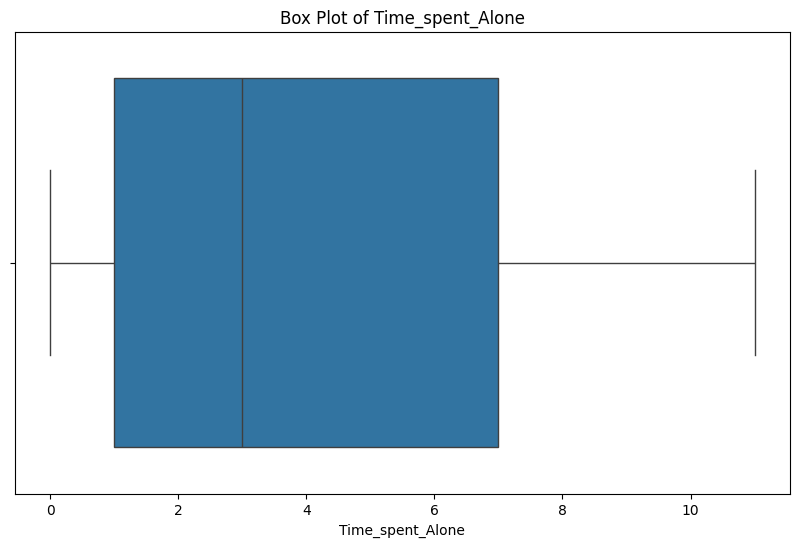

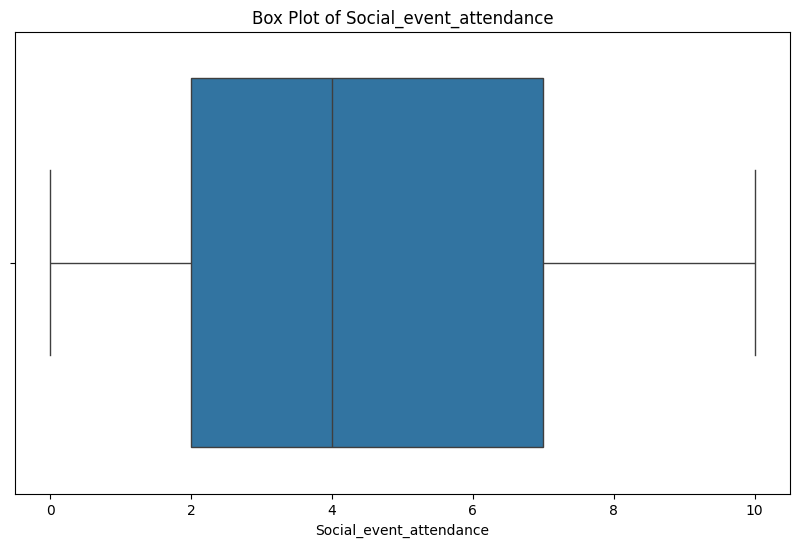

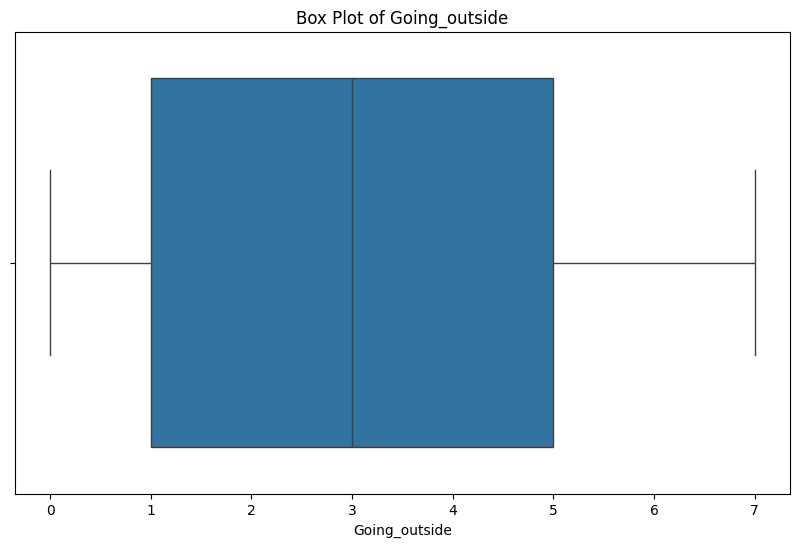

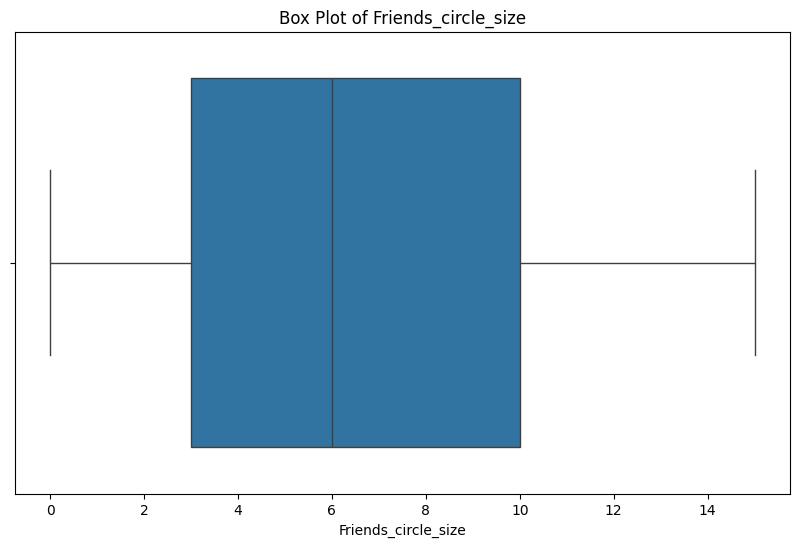

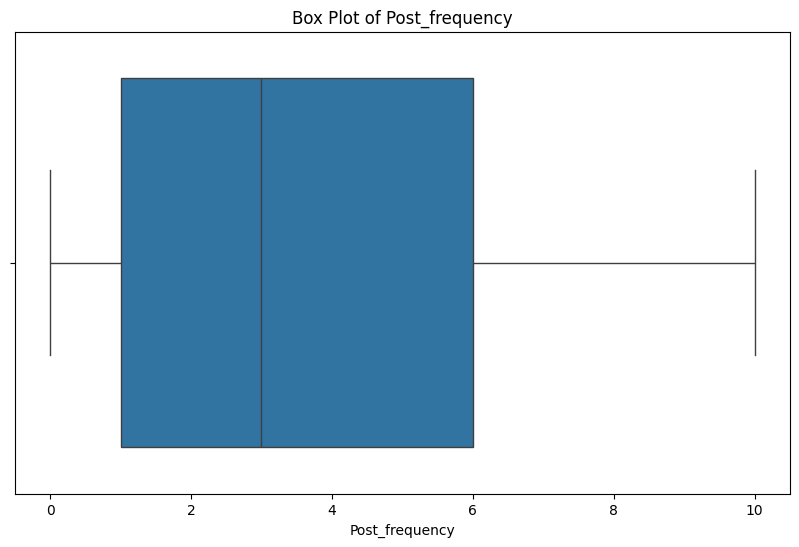

In [7]:
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [8]:
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,-0.074655,0,-0.072183,1.262143,0,1.505033,0.399658,Extrovert
1,1.388872,1,-1.461924,-1.439797,1,-1.543324,-0.285787,Introvert
2,1.388872,1,-1.114489,-0.539150,1,-0.370879,-0.628509,Introvert
3,-1.245477,0,0.622687,1.712467,0,1.739522,1.427826,Extrovert
4,-0.367361,0,1.664992,0.361496,0,0.332588,0.399658,Extrovert


In [9]:
X = df.drop('Personality', axis=1)
y = df['Personality']

y = le.fit_transform(y)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (1979, 7)
Test set: (495, 7)


In [10]:
print("Logistic Regression")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_acc = accuracy_score(y_test, lr_pred)
print(f"   Accuracy: {lr_acc:.4f}")

print(" Random Forest")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print(f"   Accuracy: {rf_acc:.4f}")


Logistic Regression
   Accuracy: 0.9212
 Random Forest
   Accuracy: 0.9556


In [11]:

print("="*50)

best_model = rf_model if rf_acc > lr_acc else lr_model
best_name = "Random Forest" if rf_acc > lr_acc else "Logistic Regression"
best_pred = rf_pred if rf_acc > lr_acc else lr_pred

print(f"Best Model: {best_name}")
print(f"Accuracy: {accuracy_score(y_test, best_pred):.4f}")
print(f"Classification Report:")
print(classification_report(y_test, best_pred, target_names=['Extrovert', 'Introvert']))

print(f"Confusion Matrix:")
print(confusion_matrix(y_test, best_pred))

if best_name == "Random Forest":
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"Feature Importance:")
    print(feature_importance)

Best Model: Random Forest
Accuracy: 0.9556
Classification Report:
              precision    recall  f1-score   support

   Extrovert       0.96      0.96      0.96       278
   Introvert       0.95      0.95      0.95       217

    accuracy                           0.96       495
   macro avg       0.95      0.95      0.95       495
weighted avg       0.96      0.96      0.96       495

Confusion Matrix:
[[267  11]
 [ 11 206]]
Feature Importance:
                     feature  importance
4  Drained_after_socializing    0.228575
1                 Stage_fear    0.224833
0           Time_spent_Alone    0.176695
2    Social_event_attendance    0.116760
6             Post_frequency    0.114606
3              Going_outside    0.095604
5        Friends_circle_size    0.042927


In [12]:

joblib.dump(best_model, 'personality_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

model_info = {
    'feature_names': list(X.columns),
    'model_name': best_name,
    'accuracy': accuracy_score(y_test, best_pred),
    'label_encoding': {'Extrovert': 0, 'Introvert': 1}
}
joblib.dump(model_info, 'model_info.pkl')


['model_info.pkl']